# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
# Reproduzindo a regressão
reg = smf.ols('tip ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        10:37:45   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

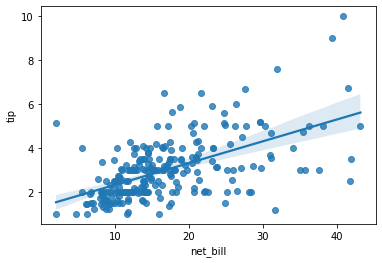

In [44]:
# gráfico de dispersão
sns.regplot(y='tip', x='net_bill', data = tips)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [50]:
# Ajustando o modelo e mostrando o resumo
reg2 = smf.ols('tip_pct ~ net_bill', data=tips[tips['tip_pct']<.5]).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.31e-12
Time:                        11:12:30   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

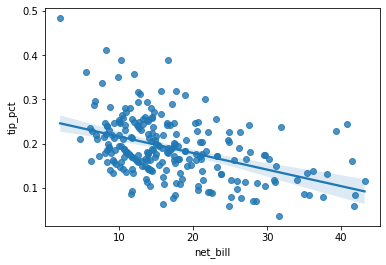

In [51]:
# Gráfico dispersão entre tip_pct e net_bill
sns.regplot(x='net_bill', y='tip_pct', data = tips[tips['tip_pct']<.5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

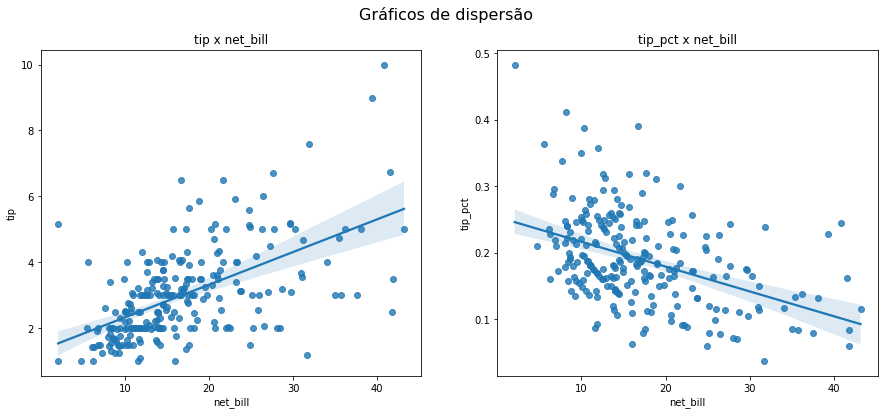

In [117]:
fig = plt.subplots(figsize=(15, 6))

ax1 = plt.subplot(121)
sns.regplot(y='tip', x='net_bill', data = tips)
ax1.set_title('tip x net_bill')

ax2 = plt.subplot(122)
sns.regplot(x='net_bill', y='tip_pct', data = tips[tips['tip_pct']<.5])
ax2.set_title('tip_pct x net_bill')

plt.suptitle('Gráficos de dispersão', fontsize=16)
plt.show();

Analisando os gráficos acima:
<br>os gráficos mostram diferentes relações entre as variáveis e os R-quadrados refletem o ajuste do modelo específico para cada gráfico.
<br>Comparar diretamente os R-quadrados entre esses dois gráficos pode ser enganoso, porque cada gráfico representa uma relação diferente entre as variáveis.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [161]:
# valor predito para tip_pct
pred_tip_pct = reg.fittedvalues
print(pred_tip_pct)

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64


In [163]:
# valor predito para tip como tip_pct * net_bill
pred_tip = reg2.fittedvalues
print(pred_tip)

0      0.194125
1      0.221392
2      0.188410
3      0.177727
4      0.175448
         ...   
239    0.167492
240    0.159760
241    0.176606
242    0.193789
243    0.194872
Length: 242, dtype: float64


In [168]:
# R quadrado do modelo para tip
r_quadrado = reg2.rsquared
print(f'R-quadrado: {r_quadrado:.4f}')

R-quadrado: 0.1895


In [169]:
# R quadrado para tip_pct
r_quadrado2 = reg.rsquared
print(f'R-quadrado: {r_quadrado2:.4f}')

R-quadrado: 0.3325


Comparando os valores r-quadrados para os modelos acima, o ajuste melhor do modelo aos dados é o do tip_pct, pois o r-quadrado é maior.